# Demarrage

##Importation des lib

In [63]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sys
import pandas as pd
import numpy as np
import sklearn
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

#Sickit learn met régulièrement à jour des versions et indique des futurs warnings.
#ces deux lignes permettent de ne pas les afficher.
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier


import spacy

from sklearn.decomposition import TruncatedSVD
from imblearn.over_sampling import SMOTE






[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


##Montage du Drive

In [66]:

from google.colab import drive
drive.mount('/content/gdrive/')

my_local_drive='/content/gdrive/ProjetML/Dataset'
# Ajout du path pour les librairies, fonctions et données
sys.path.append(my_local_drive)
# Se positionner sur le répertoire associé
%cd $my_local_drive

%pwd
!ls



Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).
[Errno 2] No such file or directory: '/content/gdrive/ProjetML/Dataset'
/content/gdrive/My Drive/ProjetML/Dataset
donnees_pretraitees.csv  donnees_traitees.csv  HAI817_Projet_test.csv  HAI817_Projet_train.csv


## Importation DataSet

In [67]:
# Charger les fichiers CSV dans des dataframes pandas
df = pd.read_csv('donnees_pretraitees.csv')

df.head()

,text,title,our rating,combined,combined_with_lowercase,combined_without_stopwords,combined_with_lemmatization,combined_with_all,rating_true_false,rating_true_false_vs_mixture,rating_all
0,Distracted driving causes more deaths in Canad...,"You Can Be Fined $1,500 If Your Passenger Is U...",false,"You Can Be Fined $1,500 If Your Passenger Is U...","you can be fined $1,500 if your passenger is u...",fined passenger using mobile phone starting ne...,"you can be fine $ 1,500 if your passenger be u...",fine passenger use mobile phone start next wee...,0,0,0
1,Missouri politicians have made statements afte...,Missouri lawmakers condemn Las Vegas shooting,mixture,Missouri lawmakers condemn Las Vegas shooting ...,missouri lawmakers condemn las vegas shooting ...,missouri lawmakers condemn las vegas shooting ...,Missouri lawmaker condemn Las Vegas shoot Miss...,missouri lawmaker condemn las vegas shoot miss...,-1,1,2
2,Home Alone 2: Lost in New York is full of viol...,CBC Cuts Donald Trump's 'Home Alone 2' Cameo O...,mixture,CBC Cuts Donald Trump's 'Home Alone 2' Cameo O...,cbc cuts donald trump's 'home alone 2' cameo o...,cbc cuts donald trump alone cameo broadcast ho...,CBC Cuts Donald Trump 's ' home alone 2 ' Came...,cbc cuts donald trump home alone cameo broadca...,-1,1,2
3,But things took a turn for the worse when riot...,Obama’s Daughters Caught on Camera Burning US ...,false,Obama’s Daughters Caught on Camera Burning US ...,obama’s daughters caught on camera burning us ...,obama daughters caught camera burning us flag ...,Obama ’s daughter catch on Camera burn US Flag...,obama daughter catch camera burn us flag dc pr...,0,0,0
4,It’s no secret that Epstein and Schiff share a...,Leaked Visitor Logs Reveal Schiff’s 78 Visits ...,false,Leaked Visitor Logs Reveal Schiff’s 78 Visits ...,leaked visitor logs reveal schiff’s 78 visits ...,leaked visitor logs reveal schiff visits epste...,Leaked Visitor Logs Reveal Schiff ’s 78 visit ...,leaked visitor logs reveal schiff visit epstei...,0,0,0


#Visualisation

##Etat initial du dataset

In [68]:
display(df.head())

,text,title,our rating,combined,combined_with_lowercase,combined_without_stopwords,combined_with_lemmatization,combined_with_all,rating_true_false,rating_true_false_vs_mixture,rating_all
0,Distracted driving causes more deaths in Canad...,"You Can Be Fined $1,500 If Your Passenger Is U...",false,"You Can Be Fined $1,500 If Your Passenger Is U...","you can be fined $1,500 if your passenger is u...",fined passenger using mobile phone starting ne...,"you can be fine $ 1,500 if your passenger be u...",fine passenger use mobile phone start next wee...,0,0,0
1,Missouri politicians have made statements afte...,Missouri lawmakers condemn Las Vegas shooting,mixture,Missouri lawmakers condemn Las Vegas shooting ...,missouri lawmakers condemn las vegas shooting ...,missouri lawmakers condemn las vegas shooting ...,Missouri lawmaker condemn Las Vegas shoot Miss...,missouri lawmaker condemn las vegas shoot miss...,-1,1,2
2,Home Alone 2: Lost in New York is full of viol...,CBC Cuts Donald Trump's 'Home Alone 2' Cameo O...,mixture,CBC Cuts Donald Trump's 'Home Alone 2' Cameo O...,cbc cuts donald trump's 'home alone 2' cameo o...,cbc cuts donald trump alone cameo broadcast ho...,CBC Cuts Donald Trump 's ' home alone 2 ' Came...,cbc cuts donald trump home alone cameo broadca...,-1,1,2
3,But things took a turn for the worse when riot...,Obama’s Daughters Caught on Camera Burning US ...,false,Obama’s Daughters Caught on Camera Burning US ...,obama’s daughters caught on camera burning us ...,obama daughters caught camera burning us flag ...,Obama ’s daughter catch on Camera burn US Flag...,obama daughter catch camera burn us flag dc pr...,0,0,0
4,It’s no secret that Epstein and Schiff share a...,Leaked Visitor Logs Reveal Schiff’s 78 Visits ...,false,Leaked Visitor Logs Reveal Schiff’s 78 Visits ...,leaked visitor logs reveal schiff’s 78 visits ...,leaked visitor logs reveal schiff visits epste...,Leaked Visitor Logs Reveal Schiff ’s 78 visit ...,leaked visitor logs reveal schiff visit epstei...,0,0,0


#Pour classe de classification True vs False vs mixture vs other

In [69]:
df.head()

,text,title,our rating,combined,combined_with_lowercase,combined_without_stopwords,combined_with_lemmatization,combined_with_all,rating_true_false,rating_true_false_vs_mixture,rating_all
0,Distracted driving causes more deaths in Canad...,"You Can Be Fined $1,500 If Your Passenger Is U...",false,"You Can Be Fined $1,500 If Your Passenger Is U...","you can be fined $1,500 if your passenger is u...",fined passenger using mobile phone starting ne...,"you can be fine $ 1,500 if your passenger be u...",fine passenger use mobile phone start next wee...,0,0,0
1,Missouri politicians have made statements afte...,Missouri lawmakers condemn Las Vegas shooting,mixture,Missouri lawmakers condemn Las Vegas shooting ...,missouri lawmakers condemn las vegas shooting ...,missouri lawmakers condemn las vegas shooting ...,Missouri lawmaker condemn Las Vegas shoot Miss...,missouri lawmaker condemn las vegas shoot miss...,-1,1,2
2,Home Alone 2: Lost in New York is full of viol...,CBC Cuts Donald Trump's 'Home Alone 2' Cameo O...,mixture,CBC Cuts Donald Trump's 'Home Alone 2' Cameo O...,cbc cuts donald trump's 'home alone 2' cameo o...,cbc cuts donald trump alone cameo broadcast ho...,CBC Cuts Donald Trump 's ' home alone 2 ' Came...,cbc cuts donald trump home alone cameo broadca...,-1,1,2
3,But things took a turn for the worse when riot...,Obama’s Daughters Caught on Camera Burning US ...,false,Obama’s Daughters Caught on Camera Burning US ...,obama’s daughters caught on camera burning us ...,obama daughters caught camera burning us flag ...,Obama ’s daughter catch on Camera burn US Flag...,obama daughter catch camera burn us flag dc pr...,0,0,0
4,It’s no secret that Epstein and Schiff share a...,Leaked Visitor Logs Reveal Schiff’s 78 Visits ...,false,Leaked Visitor Logs Reveal Schiff’s 78 Visits ...,leaked visitor logs reveal schiff’s 78 visits ...,leaked visitor logs reveal schiff visits epste...,Leaked Visitor Logs Reveal Schiff ’s 78 visit ...,leaked visitor logs reveal schiff visit epstei...,0,0,0


#Vectorization

In [70]:
X_combined = df['combined']
X_without_stopwords = df['combined_without_stopwords']
X_with_lowercase = df['combined_with_lowercase']
X_with_lemmatization = df['combined_with_lemmatization']
X_with_all = df['combined_with_all']

y = df['rating_all']


##Bow

In [79]:

vectorizerBow = CountVectorizer(ngram_range=(1, 2))

#vectorization
X_bow_combined = vectorizerBow.fit_transform(X_combined)
X_bow_without_stopwords = vectorizerBow.fit_transform(X_without_stopwords)
X_bow_with_lowercase = vectorizerBow.fit_transform(X_with_lowercase)
X_bow_with_lemmatization = vectorizerBow.fit_transform(X_with_lemmatization)
X_bow_with_all = vectorizerBow.fit_transform(X_with_all)


##TF-IDF

In [72]:

vectorizerTfIdf = TfidfVectorizer(ngram_range=(1, 2))

#vectorization
X_tfidf_combined = vectorizerTfIdf.fit_transform(X_combined)
X_tfidf_without_stopwords = vectorizerTfIdf.fit_transform(X_without_stopwords)
X_tfidf_with_lowercase = vectorizerTfIdf.fit_transform(X_with_lowercase)
X_tfidf_with_lemmatization = vectorizerTfIdf.fit_transform(X_with_lemmatization)
X_tfidf_with_all = vectorizerTfIdf.fit_transform(X_with_all)


#Equilibrage des données

##Equilibrage pour bow

In [73]:
smote = SMOTE(random_state=42)

X_bow_combined_resampled, y_combined_resampled = smote.fit_resample(X_bow_combined, y)
X_bow_without_stopclassewords_resampled, y_without_stopwords_resampled = smote.fit_resample(X_bow_without_stopwords, y)
X_bow_with_lowercase_resampled, y_with_lowercase_resampled = smote.fit_resample(X_bow_with_lowercase, y)
X_bow_with_lemmatization_resampled, y_with_lemmatization_resampled = smote.fit_resample(X_bow_with_lemmatization, y)
X_bow_with_all_resampled, y_with_all_resampled = smote.fit_resample(X_bow_with_all, y)



##Equilibrage pour tf-idf

In [74]:
X_tfidf_combined_resampled, y_combined_resampled = smote.fit_resample(X_tfidf_combined, y)
X_tfidf_without_stopwords_resampled, y_without_stopwords_resampled = smote.fit_resample(X_tfidf_without_stopwords, y)
X_tfidf_with_lowercase_resampled, y_with_lowercase_resampled = smote.fit_resample(X_tfidf_with_lowercase, y)
X_tfidf_with_lemmatization_resampled, y_with_lemmatization_resampled = smote.fit_resample(X_tfidf_with_lemmatization, y)
X_tfidf_with_all_resampled, y_with_all_resampled = smote.fit_resample(X_tfidf_with_all, y)

#Split train et test

##Avec vectoriser bow

In [75]:
X_train_bow_combined, X_test_bow_combined, y_train_bow_combined, y_test_bow_combined = train_test_split(X_bow_combined_resampled, y_combined_resampled, test_size=0.2, random_state=42)
X_train_bow_without_stopwords, X_test_bow_without_stopwords, y_train_bow_without_stopwords, y_test_bow_without_stopwords = train_test_split(X_bow_without_stopwords_resampled, y_without_stopwords_resampled, test_size=0.2, random_state=42)
X_train_bow_with_lowercase, X_test_bow_with_lowercase, y_train_bow_with_lowercase, y_test_bow_with_lowercase = train_test_split(X_bow_with_lowercase_resampled, y_with_lowercase_resampled, test_size=0.2, random_state=42)
X_train_bow_with_lemmatization, X_test_bow_with_lemmatization, y_train_bow_with_lemmatization, y_test_bow_with_lemmatization = train_test_split(X_bow_with_lemmatization_resampled, y_with_lemmatization_resampled, test_size=0.2, random_state=42)
X_train_bow_with_all, X_test_bow_with_all, y_train_bow_with_all, y_test_bow_with_all = train_test_split(X_bow_with_all_resampled, y_with_all_resampled, test_size=0.2, random_state=42)


##Avec vectoriser tfidf

In [76]:
X_train_tfidf_combined, X_test_tfidf_combined, y_train_tfidf_combined, y_test_tfidf_combined = train_test_split(X_tfidf_combined_resampled, y_combined_resampled, test_size=0.2, random_state=42)
X_train_tfidf_without_stopwords, X_test_tfidf_without_stopwords, y_train_tfidf_without_stopwords, y_test_tfidf_without_stopwords = train_test_split(X_tfidf_without_stopwords_resampled, y_without_stopwords_resampled, test_size=0.2, random_state=42)
X_train_tfidf_with_lowercase, X_test_tfidf_with_lowercase, y_train_tfidf_with_lowercase, y_test_tfidf_with_lowercase = train_test_split(X_tfidf_with_lowercase_resampled, y_with_lowercase_resampled, test_size=0.2, random_state=42)
X_train_tfidf_with_lemmatization, X_test_tfidf_with_lemmatization, y_train_tfidf_with_lemmatization, y_test_tfidf_with_lemmatization = train_test_split(X_tfidf_with_lemmatization_resampled, y_with_lemmatization_resampled, test_size=0.2, random_state=42)
X_train_tfidf_with_all, X_test_tfidf_with_all, y_train_tfidf_with_all, y_test_tfidf_with_all = train_test_split(X_tfidf_with_all_resampled, y_with_all_resampled, test_size=0.2, random_state=42)


#Reduction des vecteurs

##TFIDF

In [77]:

n_components_tfidf = 100

svd_tfidf = TruncatedSVD(n_components=n_components_tfidf)

X_train_reduced_combined = svd_tfidf.fit_transform(X_train_bow_combined)
X_test_reduced_combined = svd_tfidf.transform(X_test_bow_combined)

X_train_reduced_without_stopwords = svd_tfidf.fit_transform(X_train_bow_without_stopwords)
X_test_reduced_without_stopwords = svd_tfidf.transform(X_test_bow_without_stopwords)

X_train_reduced_with_lowercase = svd_tfidf.fit_transform(X_train_bow_with_lowercase)
X_test_reduced_with_lowercase = svd_tfidf.transform(X_test_bow_with_lowercase)

X_train_reduced_with_lemmatization = svd_tfidf.fit_transform(X_train_bow_with_lemmatization)
X_test_reduced_with_lemmatization = svd_tfidf.transform(X_test_bow_with_lemmatization)

X_train_reduced_with_all = svd_tfidf.fit_transform(X_train_bow_with_all)
X_test_reduced_with_all = svd_tfidf.transform(X_test_bow_with_all)

#Bow

In [78]:
n_components_bow = 100
svd_bow = TruncatedSVD(n_components=n_components_bow)

X_train_reduced_combined = svd_bow.fit_transform(X_train_bow_combined)
X_test_reduced_combined = svd_bow.transform(X_test_bow_combined)

X_train_reduced_without_stopwords = svd_bow.fit_transform(X_train_bow_without_stopwords)
X_test_reduced_without_stopwords = svd_bow.transform(X_test_bow_without_stopwords)

X_train_reduced_with_lowercase = svd_bow.fit_transform(X_train_bow_with_lowercase)
X_test_reduced_with_lowercase = svd_bow.transform(X_test_bow_with_lowercase)

X_train_reduced_with_lemmatization = svd_bow.fit_transform(X_train_bow_with_lemmatization)
X_test_reduced_with_lemmatization = svd_bow.transform(X_test_bow_with_lemmatization)

X_train_reduced_with_all = svd_bow.fit_transform(X_train_bow_with_all)
X_test_reduced_with_all = svd_bow.transform(X_test_bow_with_all)

#Recherche des meilleurs hyperparametres pour le modèle LogesticRegression

##Chercher hyperparametre avec bow

In [80]:
model = LogisticRegression(max_iter=1000)
solvers = ['lbfgs', 'liblinear','newton-cg']
penalty = ['l2','none']
c_values = [10, 1.0, 0.1]

grid = dict(solver=solvers, penalty=penalty, C=c_values)

grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=[(slice(None), slice(None))], scoring='accuracy', error_score=0)
grid_result = grid_search.fit(X_train_bow_combined, y_train_bow_combined)

print(f"Best: {grid_result.best_score_} using {grid_result.best_params_}")

best_params_bow = grid_result.best_params_


Best: 0.9964726631393298 using {'C': 10, 'penalty': 'none', 'solver': 'lbfgs'}


##Chercher hyperparametre avec tfidf

In [81]:
model = LogisticRegression(max_iter=1000)
solvers = ['lbfgs', 'liblinear','newton-cg']
penalty = ['l2','none']
c_values = [10, 1.0, 0.1]

grid = dict(solver=solvers, penalty=penalty, C=c_values)

grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=[(slice(None), slice(None))], scoring='accuracy', error_score=0)
grid_result_combined = grid_search.fit(X_train_tfidf_combined, y_train_tfidf_combined)

grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=[(slice(None), slice(None))], scoring='accuracy', error_score=0)
grid_result_all = grid_search.fit(X_train_tfidf_with_all, y_train_tfidf_with_all)

print(f"Best combined: {grid_result_combined.best_score_} using {grid_result_combined.best_params_}")
print(f"Best with all: {grid_result_all.best_score_} using {grid_result_all.best_params_}")


best_params_tfidf_combined = grid_result_combined.best_params_
best_params_tfidf_all = grid_result_all.best_params_



Best combined: 0.9992945326278659 using {'C': 10, 'penalty': 'none', 'solver': 'lbfgs'}
Best with all: 0.999647266313933 using {'C': 10, 'penalty': 'none', 'solver': 'lbfgs'}


#Test des resultats avec les différents prétraitements avec la vectorisation tf-idf

In [82]:
best_params_tfidf = best_params_tfidf_all

def evaluate_model(X_train, y_train, X_test, y_test):
    model = LogisticRegression(**best_params_tfidf, max_iter=1000)
    model.fit(X_train, y_train)
    accuracy = model.score(X_test, y_test)
    cv_results = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    return accuracy, cv_results

datasets = {
    "combined": (X_train_tfidf_combined, y_train_tfidf_combined, X_test_tfidf_combined, y_test_tfidf_combined),
    "without_stopwords": (X_train_tfidf_without_stopwords, y_train_tfidf_without_stopwords, X_test_tfidf_without_stopwords, y_test_tfidf_without_stopwords),
    "with_lowercase": (X_train_tfidf_with_lowercase, y_train_tfidf_with_lowercase, X_test_tfidf_with_lowercase, y_test_tfidf_with_lowercase),
    "with_lemmatization": (X_train_tfidf_with_lemmatization, y_train_tfidf_with_lemmatization, X_test_tfidf_with_lemmatization, y_test_tfidf_with_lemmatization),
    "with_all": (X_train_tfidf_with_all, y_train_tfidf_with_all, X_test_tfidf_with_all, y_test_tfidf_with_all)
}

results = {}
for name, (X_train, y_train, X_test, y_test) in datasets.items():
    accuracy, cv_results = evaluate_model(X_train, y_train, X_test, y_test)
    results[name] = {"accuracy": accuracy, "cv_results": cv_results}
    print(f"Dataset: {name}, Test Accuracy: {accuracy}, Cross-Validation Mean Accuracy: {cv_results.mean()}, Std: {cv_results.std()}")


Dataset: combined, Test Accuracy: 0.846262341325811, Cross-Validation Mean Accuracy: 0.8617283950617285, Std: 0.016264044985394716
Dataset: without_stopwords, Test Accuracy: 0.8603667136812412, Cross-Validation Mean Accuracy: 0.8793650793650795, Std: 0.011624167233357392
Dataset: with_lowercase, Test Accuracy: 0.846262341325811, Cross-Validation Mean Accuracy: 0.8617283950617285, Std: 0.016264044985394716
Dataset: with_lemmatization, Test Accuracy: 0.8349788434414669, Cross-Validation Mean Accuracy: 0.8412698412698413, Std: 0.011804727005771789
Dataset: with_all, Test Accuracy: 0.8829337094499294, Cross-Validation Mean Accuracy: 0.8652557319223986, Std: 0.012147566389927754


#Test des resultats avec les différents prétraitements avec la vectorisation bow

In [83]:
def evaluate_model_bow(X_train, y_train, X_test, y_test):
    model = LogisticRegression(**best_params_bow, max_iter=1000)
    model.fit(X_train, y_train)
    accuracy = model.score(X_test, y_test)
    cv_results = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    return accuracy, cv_results

datasets_bow = {
    "combined": (X_train_bow_combined, y_train_bow_combined, X_test_bow_combined, y_test_bow_combined),
    "without_stopwords": (X_train_bow_without_stopwords, y_train_bow_without_stopwords, X_test_bow_without_stopwords, y_test_bow_without_stopwords),
    "with_lowercase": (X_train_bow_with_lowercase, y_train_bow_with_lowercase, X_test_bow_with_lowercase, y_test_bow_with_lowercase),
    "with_lemmatization": (X_train_bow_with_lemmatization, y_train_bow_with_lemmatization, X_test_bow_with_lemmatization, y_test_bow_with_lemmatization),
    "with_all": (X_train_bow_with_all, y_train_bow_with_all, X_test_bow_with_all, y_test_bow_with_all)
}

results_bow = {}
for name, (X_train, y_train, X_test, y_test) in datasets_bow.items():
    accuracy, cv_results = evaluate_model_bow(X_train, y_train, X_test, y_test)
    results_bow[name] = {"accuracy": accuracy, "cv_results": cv_results}
    print(f"Dataset BoW: {name}, Test Accuracy: {accuracy}, Cross-Validation Mean Accuracy: {cv_results.mean()}, Std: {cv_results.std()}")

Dataset BoW: combined, Test Accuracy: 0.8081805359661495, Cross-Validation Mean Accuracy: 0.7961199294532628, Std: 0.018883610320034088
Dataset BoW: without_stopwords, Test Accuracy: 0.8011283497884344, Cross-Validation Mean Accuracy: 0.7985890652557319, Std: 0.008740396256341345
Dataset BoW: with_lowercase, Test Accuracy: 0.8081805359661495, Cross-Validation Mean Accuracy: 0.7961199294532628, Std: 0.018883610320034088
Dataset BoW: with_lemmatization, Test Accuracy: 0.7968970380818053, Cross-Validation Mean Accuracy: 0.800352733686067, Std: 0.012085955343218203
Dataset BoW: with_all, Test Accuracy: 0.7954866008462623, Cross-Validation Mean Accuracy: 0.8045855379188713, Std: 0.015592265330017886


#Comparaison bow sans parametres

Test Accuracy: 0.5902964959568733
Cross-Validation Mean Accuracy: 0.5249544999544999, Std: 0.023953052008289618
              precision    recall  f1-score   support

           0       0.63      0.86      0.73       185
           1       0.56      0.37      0.44        79
           2       0.47      0.35      0.40        81
           3       0.40      0.08      0.13        26

    accuracy                           0.59       371
   macro avg       0.51      0.41      0.42       371
weighted avg       0.56      0.59      0.55       371



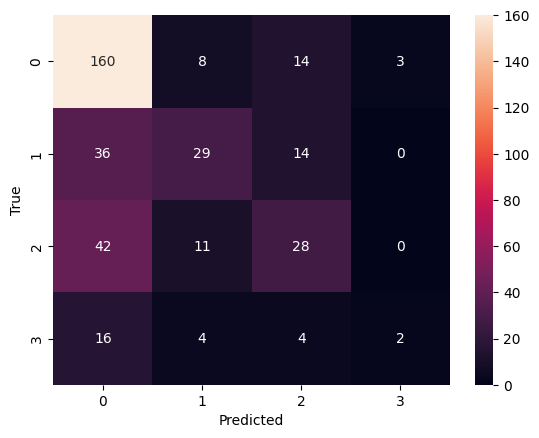

In [84]:
vectorizerBow = CountVectorizer(ngram_range=(1, 2))
X_bow_combined = vectorizerBow.fit_transform(X_combined)

X_train_bow_combined, X_test_bow_combined, y_train_bow_combined, y_test_bow_combined = train_test_split(X_bow_combined, y, test_size=0.2, random_state=42)

n_components_bow = 100
svd_bow = TruncatedSVD(n_components=n_components_bow)
X_train_reduced_combined = svd_bow.fit_transform(X_train_bow_combined)
X_test_reduced_combined = svd_bow.transform(X_test_bow_combined)

model = LogisticRegression(max_iter=1000)
model.fit(X_train_reduced_combined, y_train_bow_combined)

accuracy = model.score(X_test_reduced_combined, y_test_bow_combined)
cv_results = cross_val_score(model, X_train_reduced_combined, y_train_bow_combined, cv=5, scoring='accuracy')

print(f"Test Accuracy: {accuracy}")
print(f"Cross-Validation Mean Accuracy: {cv_results.mean()}, Std: {cv_results.std()}")

y_pred = model.predict(X_test_reduced_combined)
print(classification_report(y_test_bow_combined, y_pred))
conf_matrix = confusion_matrix(y_test_bow_combined, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

#comparaison avec equilibrage des données (meilleur precision et recall pour classe 1, 2, 3)

Test Accuracy: 0.6248236953455572
Cross-Validation Mean Accuracy: 0.599294532627866, Std: 0.020367125267375004
              precision    recall  f1-score   support

           0       0.67      0.67      0.67       192
           1       0.58      0.56      0.57       160
           2       0.60      0.50      0.55       177
           3       0.63      0.75      0.69       180

    accuracy                           0.62       709
   macro avg       0.62      0.62      0.62       709
weighted avg       0.62      0.62      0.62       709



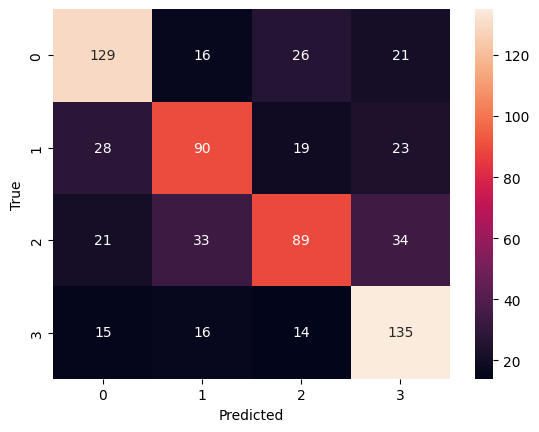

In [85]:

vectorizerBow = CountVectorizer(ngram_range=(1, 2))
X_bow_combined = vectorizerBow.fit_transform(X_combined)

smote = SMOTE(random_state=42)
X_bow_combined_resampled, y_resampled = smote.fit_resample(X_bow_combined, y)

X_train_bow_combined, X_test_bow_combined, y_train_bow_combined, y_test_bow_combined = train_test_split(X_bow_combined_resampled, y_resampled, test_size=0.2, random_state=42)

n_components_bow = 100
svd_bow = TruncatedSVD(n_components=n_components_bow)
X_train_reduced_combined = svd_bow.fit_transform(X_train_bow_combined)
X_test_reduced_combined = svd_bow.transform(X_test_bow_combined)

model = LogisticRegression(max_iter=1000)
model.fit(X_train_reduced_combined, y_train_bow_combined)

accuracy = model.score(X_test_reduced_combined, y_test_bow_combined)
cv_results = cross_val_score(model, X_train_reduced_combined, y_train_bow_combined, cv=5, scoring='accuracy')

print(f"Test Accuracy: {accuracy}")
print(f"Cross-Validation Mean Accuracy: {cv_results.mean()}, Std: {cv_results.std()}")

y_pred = model.predict(X_test_reduced_combined)
print(classification_report(y_test_bow_combined, y_pred))
conf_matrix = confusion_matrix(y_test_bow_combined, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


#Sans 2-grams

Test Accuracy: 0.5876010781671159
Cross-Validation Mean Accuracy: 0.5303576303576303, Std: 0.014747380734523979
              precision    recall  f1-score   support

           0       0.63      0.88      0.74       185
           1       0.60      0.35      0.44        79
           2       0.44      0.33      0.38        81
           3       0.00      0.00      0.00        26

    accuracy                           0.59       371
   macro avg       0.42      0.39      0.39       371
weighted avg       0.54      0.59      0.54       371



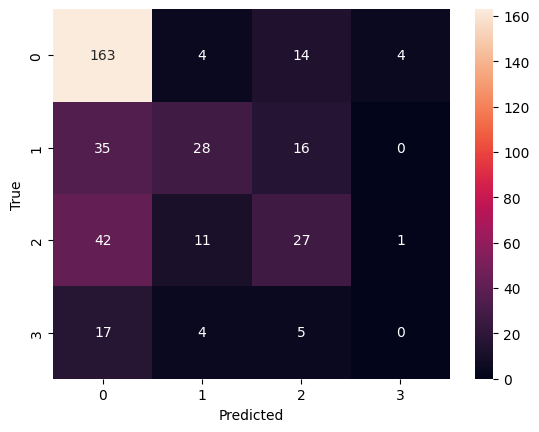

In [86]:
vectorizerBow = CountVectorizer(ngram_range=(1, 1))
X_bow_combined = vectorizerBow.fit_transform(X_combined)

X_train_bow_combined, X_test_bow_combined, y_train_bow_combined, y_test_bow_combined = train_test_split(X_bow_combined, y, test_size=0.2, random_state=42)

n_components_bow = 100
svd_bow = TruncatedSVD(n_components=n_components_bow)
X_train_reduced_combined = svd_bow.fit_transform(X_train_bow_combined)
X_test_reduced_combined = svd_bow.transform(X_test_bow_combined)

model = LogisticRegression(max_iter=1000)
model.fit(X_train_reduced_combined, y_train_bow_combined)

accuracy = model.score(X_test_reduced_combined, y_test_bow_combined)
cv_results = cross_val_score(model, X_train_reduced_combined, y_train_bow_combined, cv=5, scoring='accuracy')

print(f"Test Accuracy: {accuracy}")
print(f"Cross-Validation Mean Accuracy: {cv_results.mean()}, Std: {cv_results.std()}")

y_pred = model.predict(X_test_reduced_combined)
print(classification_report(y_test_bow_combined, y_pred))
conf_matrix = confusion_matrix(y_test_bow_combined, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

#Autres classifieurs

In [90]:
X_all = df['combined_with_all']
y = df['rating_all']

vectorizerTfIdf = TfidfVectorizer(ngram_range=(1, 2))
X_tfidf_all = vectorizerTfIdf.fit_transform(X_all)

smote = SMOTE(random_state=42)
X_tfidf_all_resampled, y_resampled = smote.fit_resample(X_tfidf_all, y)

n_components_tfidf = 100
svd_tfidf = TruncatedSVD(n_components=n_components_tfidf)
X_reduced_all = svd_tfidf.fit_transform(X_tfidf_all_resampled)

X_train_reduced_all, X_test_reduced_all, y_train_resampled, y_test_resampled = train_test_split(X_reduced_all, y_resampled, test_size=0.2, random_state=42)


##Modèle Random forest



Best: 0.999647266313933 using {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Test Accuracy: 0.847672778561354
              precision    recall  f1-score   support

           0       0.79      0.78      0.79       192
           1       0.78      0.84      0.81       160
           2       0.82      0.82      0.82       177
           3       1.00      0.96      0.98       180

    accuracy                           0.85       709
   macro avg       0.85      0.85      0.85       709
weighted avg       0.85      0.85      0.85       709



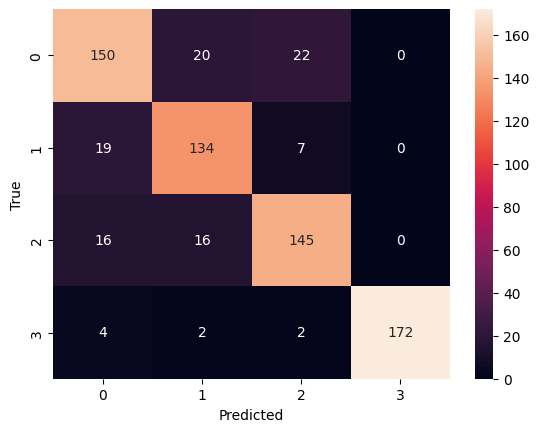

In [93]:

model = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=[(slice(None), slice(None))], scoring='accuracy')
grid_result = grid_search.fit(X_train_reduced_all, y_train_resampled)

print(f"Best: {grid_result.best_score_} using {grid_result.best_params_}")

best_params_rf = grid_result.best_params_
best_rf_model = RandomForestClassifier(**best_params_rf, random_state=42)
best_rf_model.fit(X_train_reduced_all, y_train_resampled)

accuracy = best_rf_model.score(X_test_reduced_all, y_test_resampled)
print(f"Test Accuracy: {accuracy}")

y_pred = best_rf_model.predict(X_test_reduced_all)
print(classification_report(y_test_resampled, y_pred))
conf_matrix = confusion_matrix(y_test_resampled, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

#Modele SVM

Best: 0.9065255731922398 using {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Test Accuracy: 0.8180535966149506
              precision    recall  f1-score   support

           0       0.72      0.76      0.74       192
           1       0.76      0.76      0.76       160
           2       0.82      0.80      0.81       177
           3       0.99      0.95      0.97       180

    accuracy                           0.82       709
   macro avg       0.82      0.82      0.82       709
weighted avg       0.82      0.82      0.82       709



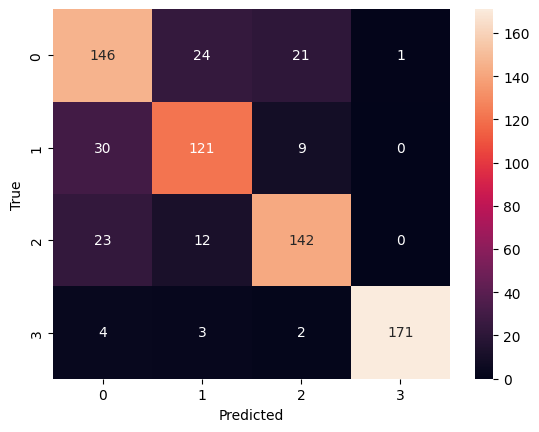

In [94]:
model = SVC(random_state=42)

param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=[(slice(None), slice(None))], scoring='accuracy')
grid_result = grid_search.fit(X_train_reduced_all, y_train_resampled)

print(f"Best: {grid_result.best_score_} using {grid_result.best_params_}")

best_params_svc = grid_result.best_params_
best_svc_model = SVC(**best_params_svc, random_state=42)
best_svc_model.fit(X_train_reduced_all, y_train_resampled)

accuracy = best_svc_model.score(X_test_reduced_all, y_test_resampled)
print(f"Test Accuracy: {accuracy}")

y_pred = best_svc_model.predict(X_test_reduced_all)
print(classification_report(y_test_resampled, y_pred))
conf_matrix = confusion_matrix(y_test_resampled, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()